In [44]:
import pickle

import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator

In [45]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/test/maps/test_None.pkl", "rb"))

In [46]:
data['parameters']

{'path_out': 'test/',
 'datafilename': 'test',
 'CMB': {'cmb': True, 'seed': 1, 'r': 0, 'Alens': 1},
 'Foregrounds': {'Dust': True, 'Synchrotron': False},
 'QUBIC': {'instrument': 'MB',
  'configuration': 'TD',
  'npointings': 8000,
  'nsub_in': 8,
  'nsub_out': 8,
  'nrec': 2,
  'convolution_in': True,
  'convolution_out': False,
  'bandpass_correction': True,
  'NOISE': {'ndet': 0,
   'npho150': 0,
   'npho220': 0,
   'detector_nep': 2.05e-16,
   'duration_150': 0.27397,
   'duration_220': 1,
   'seed_noise': 11111},
  'SYNTHBEAM': {'synthbeam_kmax': 1, 'synthbeam_fraction': 1},
  'dtheta': 11.5,
  'POINTINGS': {'random_pointing': False,
   'sweeping_pointing': False,
   'repeat_pointing': False,
   'scanning_strategy': True}},
 'SKY': {'nside': 128,
  'coverage_cut': 0.1,
  'RA_center': 359.99901645,
  'DEC_center': -0.00573218},
 'PLANCK': {'external_data': True,
  'weight_planck': 0,
  'level_noise_planck': 0,
  'seed_noise': 22222,
  'bandwidth_planck': 0.2,
  'nsub_planck': 100}

In [47]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input = data["maps_in"]
maps_rec = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res = maps_input - maps_rec
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

In [48]:
print(Nrec)
print(nus.shape)
print(maps_input.shape)

2
(9,)
(2, 196608, 3)


In [49]:
print("FWHM in: ", fwhm_in)
print("mean fwhm in: ", np.mean(fwhm_in))
print("FWHM out: ", fwhm_out)
print("FWHM rec: ", fwhm_rec)

FWHM in:  [0.00770965 0.00747123 0.00724017 0.00701626 0.00679928 0.006589
 0.00638523 0.00618776]
mean fwhm in:  0.0069248230136742155
FWHM out:  [0. 0. 0. 0. 0. 0. 0. 0.]
FWHM rec:  [0.00733181 0.00646807 0.0093666  0.00785398 0.00383972 0.00279253
 0.0020944  0.00142535 0.00142535]


/tmp/ipykernel_4429/817838459.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


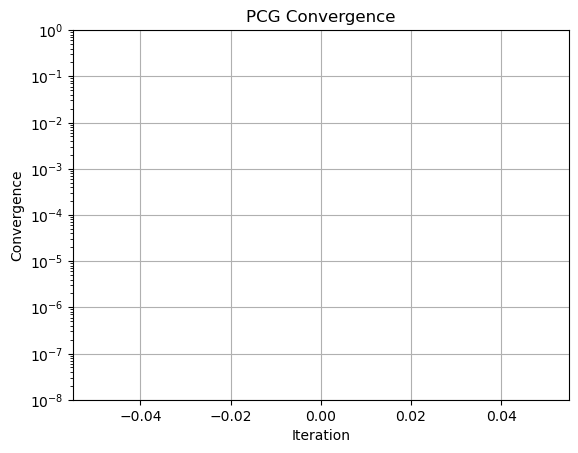

In [50]:
plt.plot(convergence)
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.title("PCG Convergence")
plt.yscale("log")
plt.ylim(1e-8, 1e0)
plt.grid()
plt.show()

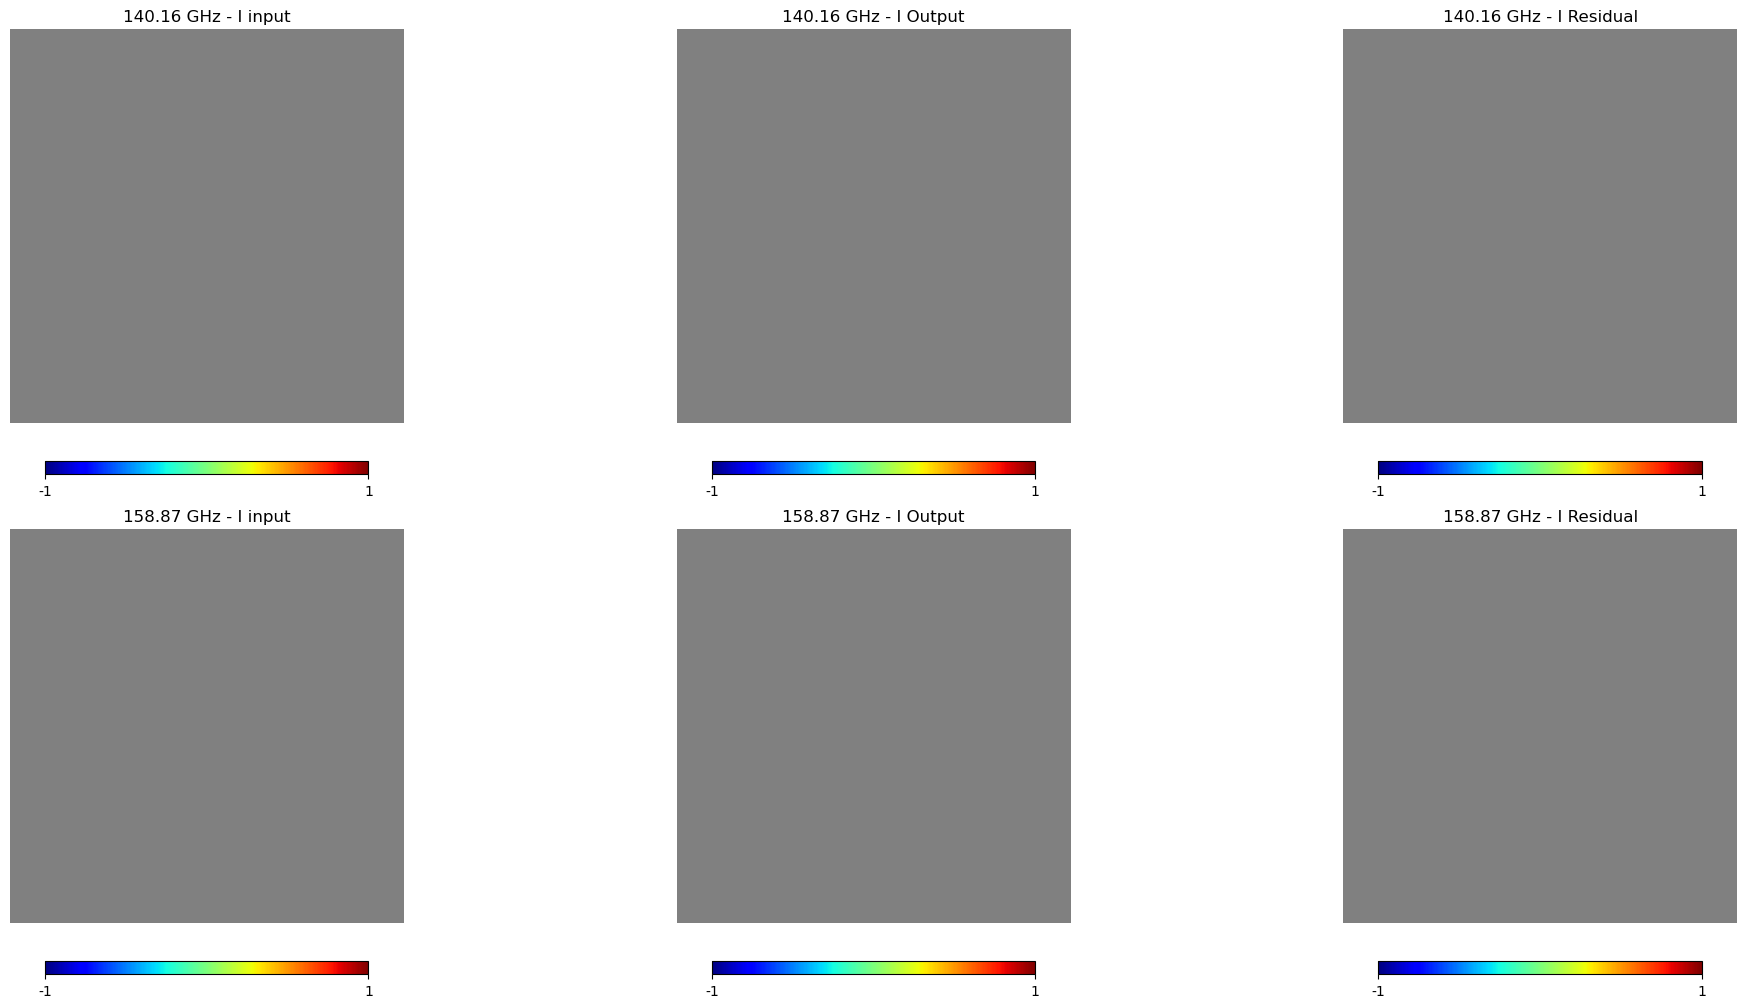

In [51]:
STOKES = ["I", "Q", "U"]

maps_input[:, ~seenpix, :] = hp.UNSEEN
maps_rec[:, ~seenpix, :] = hp.UNSEEN
maps_res[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2
# sigma_input = np.std(maps_input[:, seenpix, istk], axis=0)
# sigma_rec = np.std(maps_rec[:, seenpix, istk], axis=0)
# sigma_res = np.std(maps_rec[:, seenpix, istk] - maps_input[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="jet",
                        # min = - n * sigma_input[inu],
                        # max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="jet",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

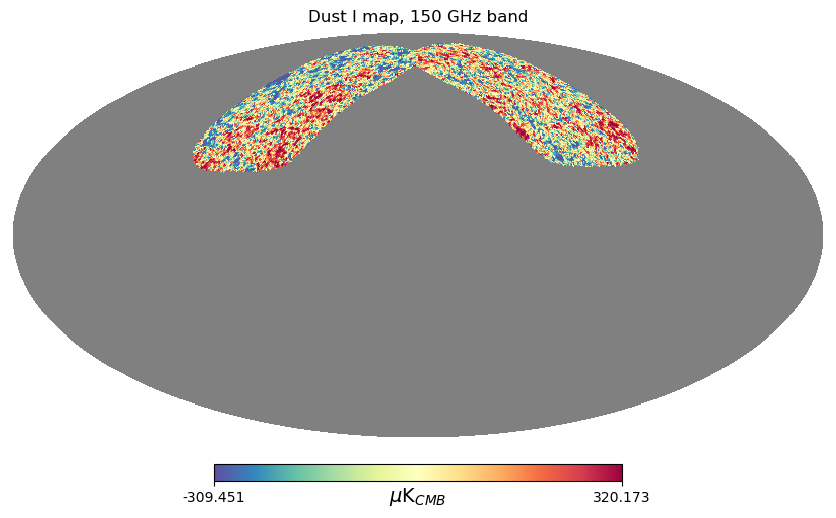

In [52]:
hp.mollview(maps_rec[0, :, 0], cmap='Spectral_r', norm='hist', unit = r'$\mu$K$_{{CMB}}$',
            title='Dust {} map, 150 GHz band'.format(STOKES[istk]))

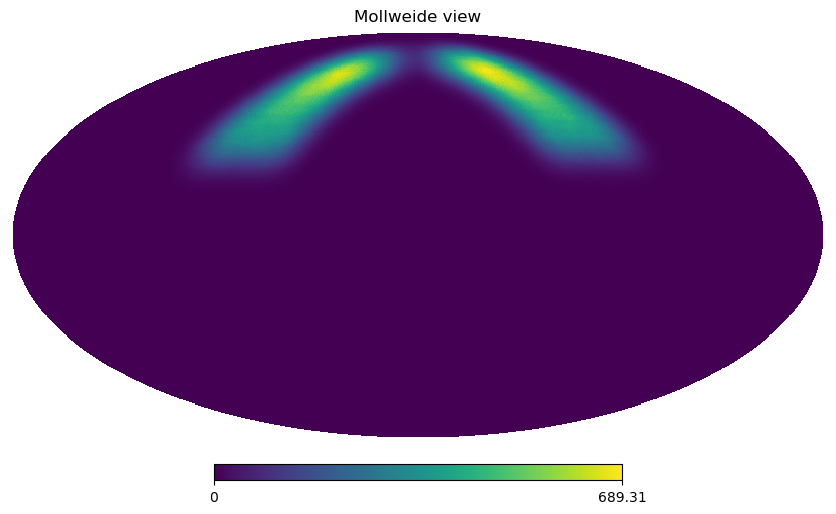

In [53]:
hp.mollview(data['coverage'])